# WeatherPy
----

### Analysis

- As expected temperature increases as we approach the equator (0 Deg. Latitude). 
- City Latitude vs cloudiness Plot shows that cloudiness are somewhat indifferent to Latitudes, but it is interesting to see that a a number of cities sits at between 20 to 80 Latitude with 100% cloudiness.
- City Latitude vs Windspeed Plot shows that Windspeeds are somewhat indifferent to Latitudes, but it is important to note that highest wind speed occur at latitudes furthest from the equator at alomost with over 25 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# Create a df to lat, lon 
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)
cities_df

,City,Country


In [4]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

## Generate Cities List

In [5]:
# Randomly generate a list of 500 cities. Use 50 to test for duplicates.# Rando 
for x in range(1500):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

#Remove duplicate cities
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()

index      595
City       595
Country    595
dtype: int64

In [6]:
#Create a df to add all the data from the API calls.
column_names = ["City","Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
clean_cities_df = pd.DataFrame(columns=column_names)
clean_cities_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# OpenWeatherMap API Key
api_key = "4d0de241d02dabb93cd2fbbf60c865a6"


# Loop through the list of cities and add the data to the df. 
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
        clean_cities_df.set_value(index, "City", city_data["name"])
        clean_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        clean_cities_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        clean_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        clean_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        clean_cities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        clean_cities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        clean_cities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1


Beginning Data Retrieval


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_l

------------------------
Proceesing: City #  1  |  Rikitea PF
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=rikitea
------------------------
Proceesing: City #  2  |  Dhidhdhoo MV
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=dhidhdhoo
------------------------
Proceesing: City #  3  |  Nerchinskiy Zavod RU
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=nerchinskiy+zavod
------------------------
Proceesing: City #  4  |  Busselton AU
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=busselton
------------------------
Proceesing: City #  5  |  Batemans Bay AU
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=batemans+bay
------------------------
Proceesing: City #  6  |  Yatou CM
http://api.openweathermap.org/data/2.

------------------------
Proceesing: City #  47  |  Cidreira BR
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=cidreira
------------------------
Proceesing: City #  48  |  Praia da Vitoria PT
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=praia+da+vitoria
------------------------
Proceesing: City #  49  |  Hermanus ZA
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=hermanus
City not found, skipping...
------------------------
Proceesing: City #  50  |  Waingapu ID
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=waingapu
------------------------
Proceesing: City #  51  |  Pacific Grove US
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=pacific+grove
------------------------
Proceesing: City #  52  |  Jiuquan CN
htt

------------------------
Proceesing: City #  92  |  Nabire ID
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=nabire
------------------------
Proceesing: City #  93  |  Port Elizabeth US
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=port+elizabeth
City not found, skipping...
------------------------
Proceesing: City #  94  |  Kodiak US
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=kodiak
------------------------
Proceesing: City #  95  |  Boyuibe BO
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=boyuibe
------------------------
Proceesing: City #  96  |  Areosa PT
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=areosa
------------------------
Proceesing: City #  97  |  Rupert US
http://api.openweathermap.org/da

------------------------
Proceesing: City #  138  |  Slave Lake CA
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=slave+lake
City not found, skipping...
------------------------
Proceesing: City #  139  |  Meadow Lake CA
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=meadow+lake
------------------------
Proceesing: City #  140  |  Chokurdakh RU
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=chokurdakh
------------------------
Proceesing: City #  141  |  Avera US
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=avera
------------------------
Proceesing: City #  142  |  Nikolskoye RU
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=nikolskoye
------------------------
Proceesing: City #  143  |  Adrar DZ
http://api.op

------------------------
Proceesing: City #  184  |  Kargala RU
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=kargala
------------------------
Proceesing: City #  185  |  Tuktoyaktuk CA
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=tuktoyaktuk
------------------------
Proceesing: City #  186  |  Lebanon US
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=lebanon
------------------------
Proceesing: City #  187  |  Bereda ES
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=bereda
------------------------
Proceesing: City #  188  |  Mehran IR
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=mehran
------------------------
Proceesing: City #  189  |  Raudeberg NO
http://api.openweathermap.org/data/2.5/weather?appid=4d

------------------------
Proceesing: City #  230  |  Nortelandia BR
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=nortelandia
------------------------
Proceesing: City #  231  |  Pareora NZ
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=pareora
City not found, skipping...
------------------------
Proceesing: City #  232  |  Rusape ZW
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=rusape
------------------------
Proceesing: City #  233  |  Trelew AR
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=trelew
------------------------
Proceesing: City #  234  |  Puerto Ayora EC
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=puerto+ayora
------------------------
Proceesing: City #  235  |  Vostok RU
http://api.openweath

------------------------
Proceesing: City #  276  |  Kazan RU
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=kazan
------------------------
Proceesing: City #  277  |  Narragansett US
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=narragansett
------------------------
Proceesing: City #  278  |  The Pas CA
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=the+pas
------------------------
Proceesing: City #  279  |  Kitimat CA
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=kitimat
------------------------
Proceesing: City #  280  |  Mpanda TZ
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=mpanda
------------------------
Proceesing: City #  281  |  Smolensk RU
http://api.openweathermap.org/data/2.5/weather?appid=4d0

------------------------
Proceesing: City #  321  |  East London ZA
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=east+london
------------------------
Proceesing: City #  322  |  Provideniya RU
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=provideniya
------------------------
Proceesing: City #  323  |  Maunabo PR
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=maunabo
------------------------
Proceesing: City #  324  |  Mahebourg MU
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=mahebourg
------------------------
Proceesing: City #  325  |  Stanger ZA
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=stanger
City not found, skipping...
------------------------
Proceesing: City #  326  |  Muborak UZ
http://api.op

------------------------
Proceesing: City #  367  |  Ixtapa MX
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=ixtapa
------------------------
Proceesing: City #  368  |  Makasar ID
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=makasar
City not found, skipping...
City not found, skipping...
------------------------
Proceesing: City #  369  |  Faya SA
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=faya
------------------------
Proceesing: City #  370  |  Xinqing CN
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=xinqing
------------------------
Proceesing: City #  371  |  Sibolga ID
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=sibolga
------------------------
Proceesing: City #  372  |  Staraya Toropa RU
http:/

------------------------
Proceesing: City #  414  |  Viedma AR
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=viedma
City not found, skipping...
------------------------
Proceesing: City #  415  |  Alcudia ES
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=alcudia
------------------------
Proceesing: City #  416  |  Verkhniy baskunchak KZ
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=verkhniy+baskunchak
------------------------
Proceesing: City #  417  |  Aloleng PH
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=aloleng
------------------------
Proceesing: City #  418  |  Mount Gambier AU
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=mount+gambier
------------------------
Proceesing: City #  419  |  Vestmannae

------------------------
Proceesing: City #  460  |  Kysyl-Syr RU
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=kysyl-syr
------------------------
Proceesing: City #  461  |  Ulladulla AU
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=ulladulla
------------------------
Proceesing: City #  462  |  Alenquer BR
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=alenquer
------------------------
Proceesing: City #  463  |  Pontes e Lacerda BR
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=pontes+e+lacerda
------------------------
Proceesing: City #  464  |  Mayumba GA
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=mayumba
------------------------
Proceesing: City #  465  |  Herat AF
http://api.openweathermap.org/data/

------------------------
Proceesing: City #  506  |  Boysun UZ
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=boysun
------------------------
Proceesing: City #  507  |  Khandbari NP
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=khandbari
------------------------
Proceesing: City #  508  |  Burnie AU
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=burnie
------------------------
Proceesing: City #  509  |  Shahreza IR
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=shahreza
------------------------
Proceesing: City #  510  |  Rio Pomba BR
http://api.openweathermap.org/data/2.5/weather?appid=4d0de241d02dabb93cd2fbbf60c865a6&units=IMPERIAL&q=rio+pomba
------------------------
Proceesing: City #  511  |  Lyskovo RU
http://api.openweathermap.org/data/2.5/weather?appid=4d

In [8]:
clean_cities_df.count()

City                542
Country             542
Temperature (F)     542
Latitude            542
Longitude           542
Humidity (%)        542
Cloudiness (%)      542
Wind Speed (mph)    542
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
clean_cities_df

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Rikitea,PF,73.41,-23.12,-134.97,100,0,8.23
1,Dhidhdhoo,MV,83.58,6.88,73.1,100,8,8.46
2,Nerchinskiy Zavod,RU,67.02,51.31,119.61,64,64,10.69
3,Busselton,AU,58.56,-33.64,115.35,100,80,13.82
4,Batemans Bay,AU,68.91,-35.71,150.18,61,0,6.55
5,Yatou,CM,75.2,3.63,9.81,100,75,2.24
6,Umm Lajj,SA,85.92,25.02,37.27,77,0,7.34
8,Cravo Norte,CO,75.84,6.3,-70.2,92,88,3.42
9,Yeppoon,AU,77,-23.13,150.74,36,0,12.75
10,Hobart,AU,66.2,-42.88,147.33,45,75,16.11


In [10]:
#Reset the index
clean_cities_df = clean_cities_df.reset_index()
del clean_cities_df['index']
clean_cities_df.head(25)

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Rikitea,PF,73.41,-23.12,-134.97,100,0,8.23
1,Dhidhdhoo,MV,83.58,6.88,73.1,100,8,8.46
2,Nerchinskiy Zavod,RU,67.02,51.31,119.61,64,64,10.69
3,Busselton,AU,58.56,-33.64,115.35,100,80,13.82
4,Batemans Bay,AU,68.91,-35.71,150.18,61,0,6.55
5,Yatou,CM,75.2,3.63,9.81,100,75,2.24
6,Umm Lajj,SA,85.92,25.02,37.27,77,0,7.34
7,Cravo Norte,CO,75.84,6.3,-70.2,92,88,3.42
8,Yeppoon,AU,77,-23.13,150.74,36,0,12.75
9,Hobart,AU,66.2,-42.88,147.33,45,75,16.11


In [11]:
# Save data to a CSV file
output_data_file = clean_cities_df.to_csv ("../output_data/cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

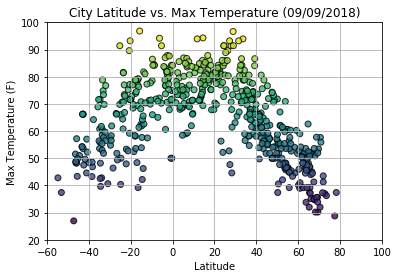

In [30]:
#scatter plot for Latitude vs. Temperature

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Temperature (F)"], c=clean_cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature (09/09/2018)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 100])
plt.ylim([20, 100])

# Save the figure
plt.savefig("../output_data/Latitude_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

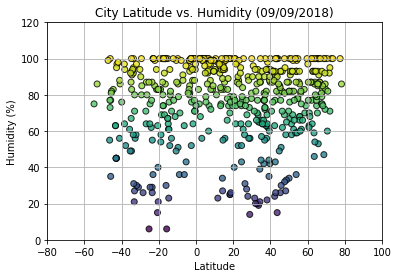

In [29]:
#scatter plot for Latitude vs. Humidity

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Humidity (%)"], c=clean_cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="City")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (09/09/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([0, 120])

# Save the figure
plt.savefig("../output_data/Latitude_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

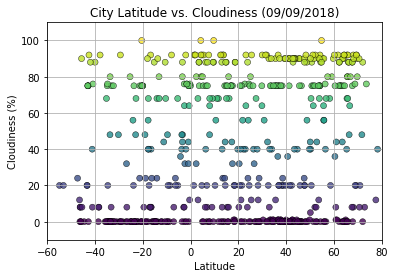

In [28]:
#scatter plot for Latitude vs. Cloudiness (%)#Build a 

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Cloudiness (%)"], c=clean_cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=0.5, marker="o", 
            alpha=0.8, label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (09/09/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 80])
plt.ylim([-10, 110])

# Save the figure
plt.savefig("../output_data/Latitude_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

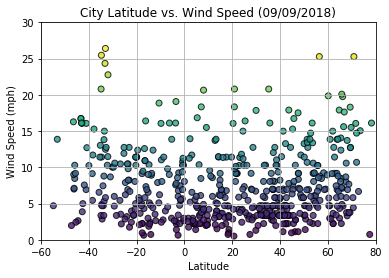

In [27]:
#scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Wind Speed (mph)"], c=clean_cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="City")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Wind Speed (09/09/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 80])
plt.ylim([0, 30])

# Save the figure
plt.savefig("../output_data/Latitude_Windspeed.png")

# Show plot
plt.show()